In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Netflix Movies and TV Shows Analysis

> This project delivers a structured exploratory data analysis of Netflix’s movies and TV shows dataset. It highlights key trends in content production, genres, ratings, and global distribution.


### **What This Analysis Covers**

* Content types comparison (Movies vs TV Shows)
* Most common genres and categoriesCountry wise content production
* Release trends across years
* Ratings breakdown and movie duration patterns



### **Objective**

To understand Netflix’s content strategy and uncover patterns in genre preference, regional output, and release timelines.

## Import Libraries

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

## Import Data

In [118]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [120]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [121]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [122]:
df.shape

(8807, 12)

In [123]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data cleaning

In [124]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

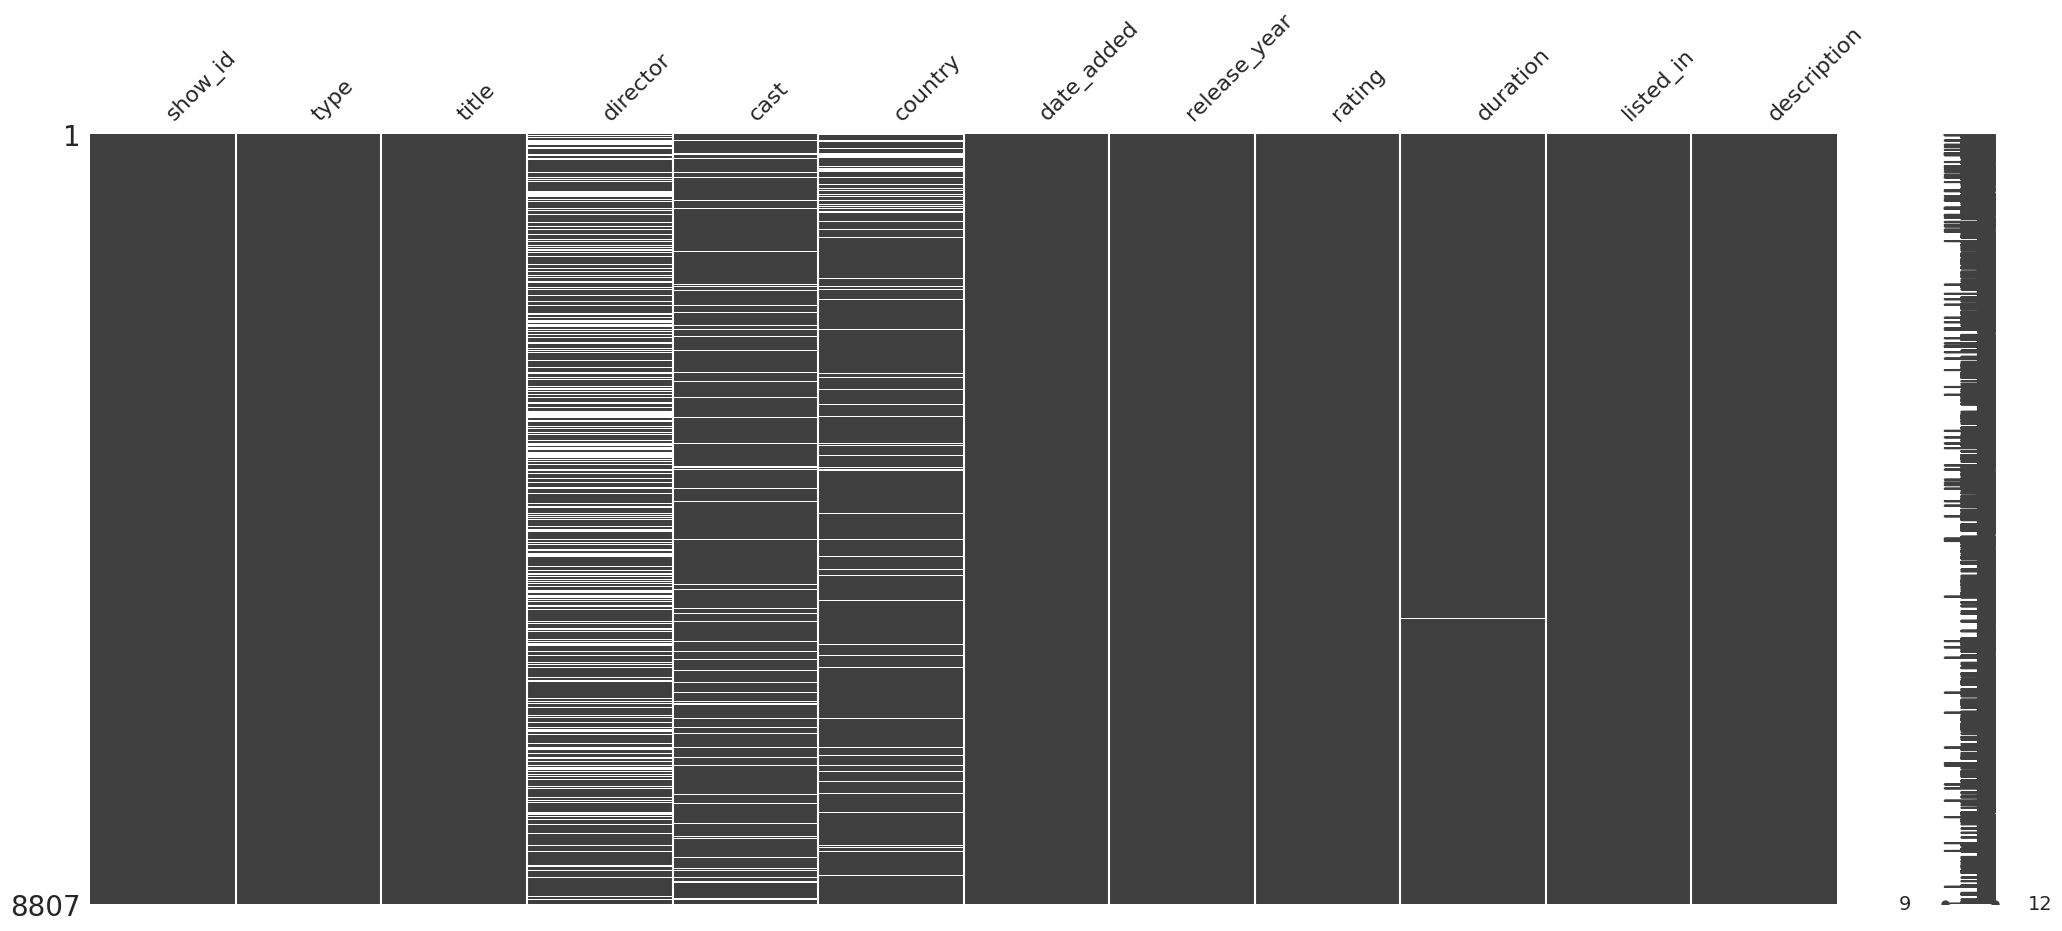

In [125]:
# fun way to visualize missing value.
msno.matrix(df)

In [126]:
# df.dropna(subset=['director'], inplace=True)


In [127]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)


In [128]:
df['date_added'].fillna(method='ffill', inplace=True)  

In [129]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [153]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

-----

## EDA

###  Top Directors

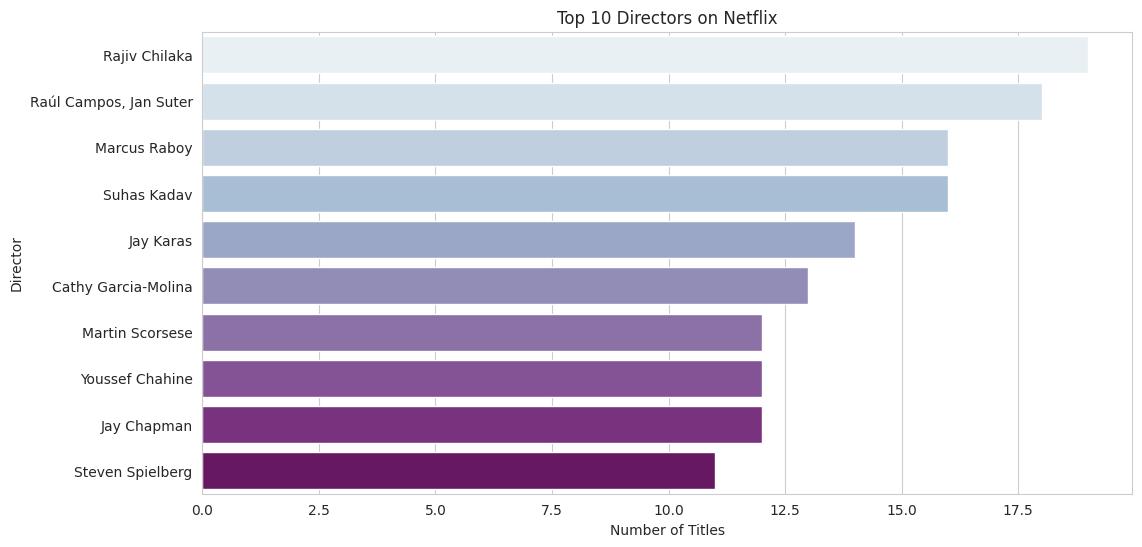

In [130]:
plt.figure(figsize=(12, 6))

# Filter out 'Unknown'
directors_filtered = df[df['director'] != 'Unknown']
top_directors = directors_filtered['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette='BuPu')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


* Shows which directors have the most content on Netflix, highlighting key contributors to the platform.
* Helps understand the type of content Netflix favors, as directors often specialize in certain genres.

----

### Top 10 Genres

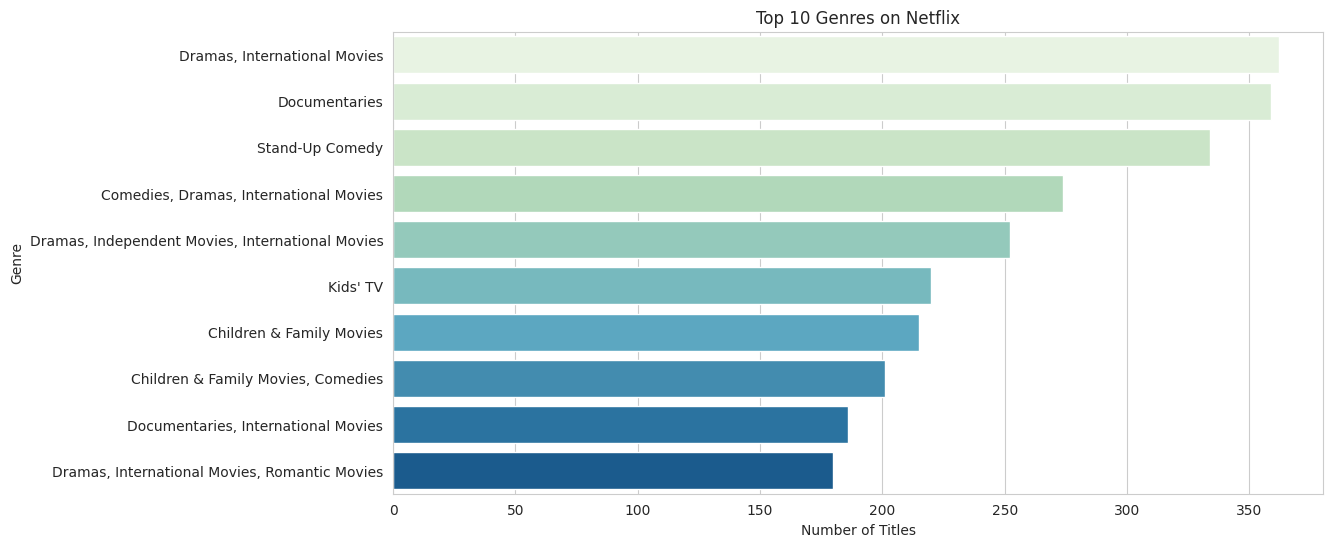

In [131]:
plt.figure(figsize=(12, 6))
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='GnBu')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

* Netflix’s focus areas based on viewer preferences or acquisition strategy.
* Helps understand which types of content Netflix prioritizes for engagement and retention.

-----

###  Count the distribution of Movies vs TV Shows  

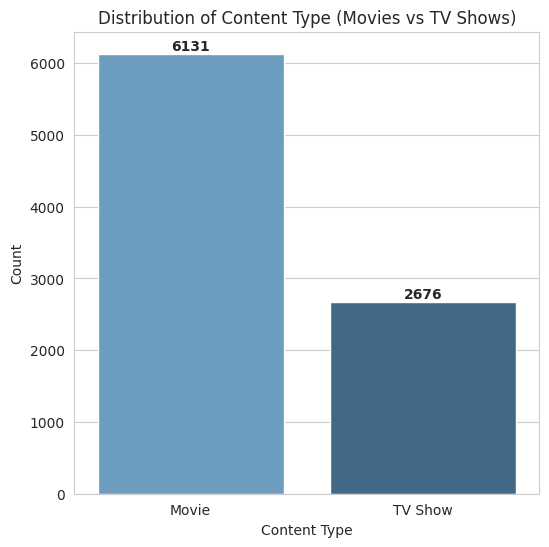

In [132]:
content_type = df['type'].value_counts()

plt.figure(figsize=(6,6))
ax = sns.barplot(x=content_type.index, y=content_type.values, palette="Blues_d")
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.ylabel('Count')
plt.xlabel('Content Type')

# Add numbers on top of bars
for i, v in enumerate(content_type.values):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')  # +50 to lift number above bar

plt.show()

* Netflix focuses more on movies then TV shows.


### Count content by release year

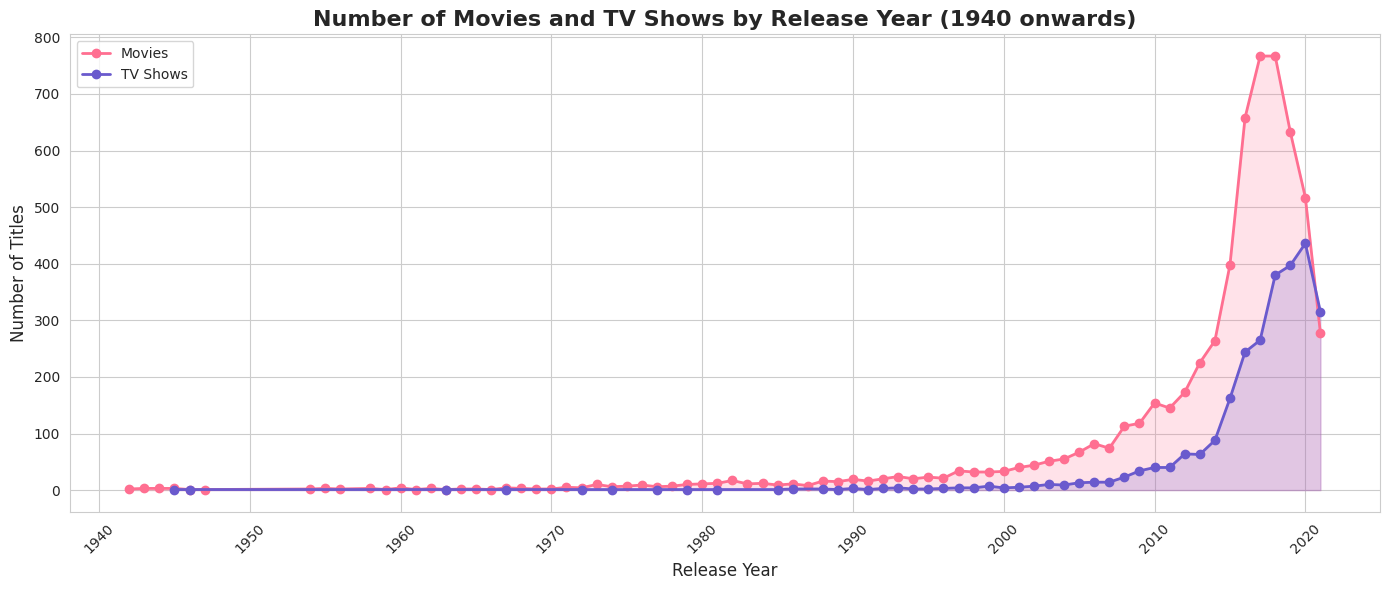

In [145]:
# Filter release years >= 1940
movie_df = df[(df['type']=='Movie') & (df['release_year']>=1940)]
tv_df = df[(df['type']=='TV Show') & (df['release_year']>=1940)]

# Count per year
movie_counts = movie_df['release_year'].value_counts().sort_index()
tv_counts = tv_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")  

# Plot Movies
plt.plot(movie_counts.index, movie_counts.values, marker='o', linestyle='-', color='#FF6F91', linewidth=2, markersize=6, label='Movies')

# Plot TV Shows
plt.plot(tv_counts.index, tv_counts.values, marker='o', linestyle='-', color='#6A5ACD', linewidth=2, markersize=6, label='TV Shows')


plt.fill_between(movie_counts.index, movie_counts.values, color='#FF6F91', alpha=0.2)
plt.fill_between(tv_counts.index, tv_counts.values, color='#6A5ACD', alpha=0.2)

plt.title('Number of Movies and TV Shows by Release Year (1940 onwards)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


----

### Count the number of movies / TV shows by country  

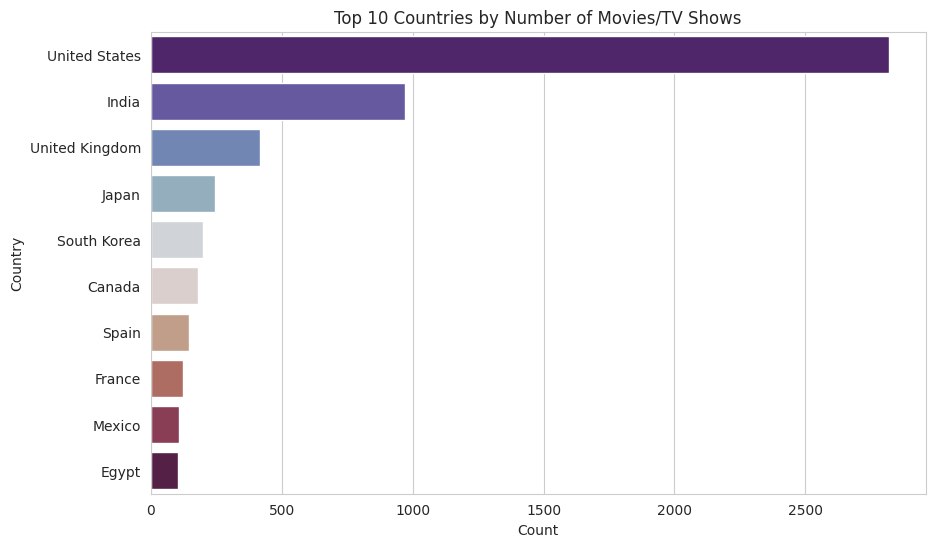

In [158]:
plt.figure(figsize=(10,6))

# Filter out NaN / Unknown
countries_filtered = df[df['country'].notna() & (df['country'] != 'Unknown')]
top_countries = countries_filtered['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette="twilight_shifted")
plt.title('Top 10 Countries by Number of Movies/TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


* The countries at the top "United States" produce the most Netflix content.
* Other countries appearing in the top 10 (like India, UK, or South Korea) indicate regions where Netflix is investing in local content.

-----

### Ratings Breakdown

Shows which ratings (e.g., TV-MA, PG-13, TV-14) appear most frequently on Netflix.

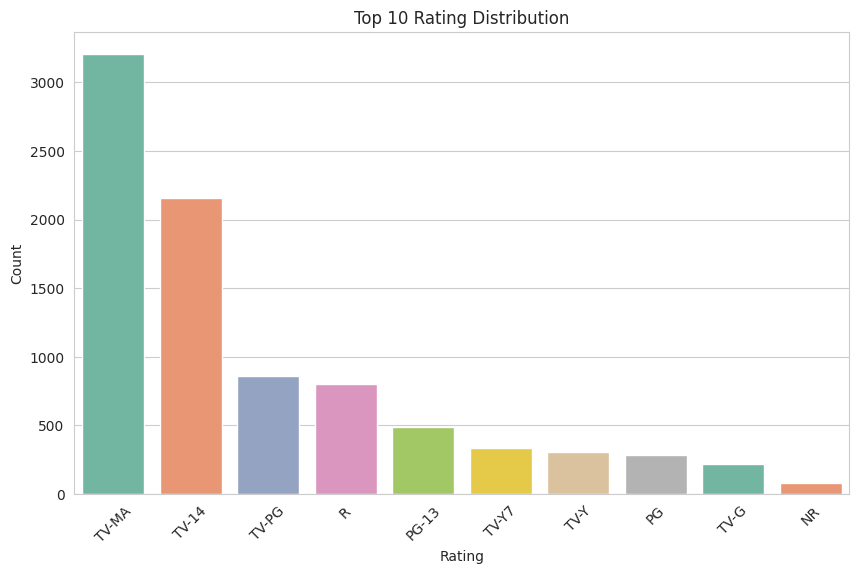

In [157]:
plt.figure(figsize=(10,6))


rating_counts = df['rating'].value_counts().head(10)

sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.title('Top 10 Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



* Helps understand Netflix’s audience focus: adult content vs. family-friendly content.
* A high count of TV-MA titles indicates more mature content.

---

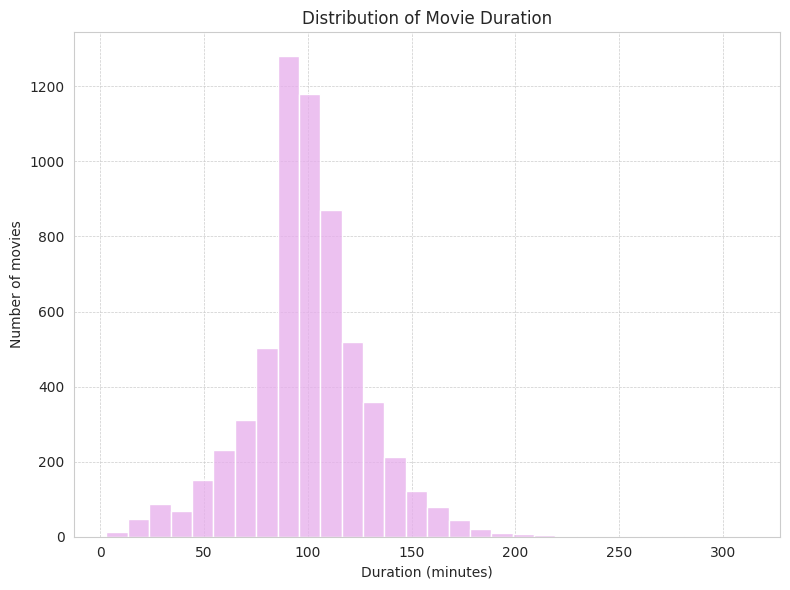

In [149]:
plt.figure(figsize=(8,6))
sns.histplot(movie_df['duration_int'], bins=30, color="#e6adec", edgecolor='white')
plt.title("Distribution of Movie Duration")
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



* Most movies cluster around 80–120 minutes, showing Netflix’s preferred standard movie runtime.
* Very short (<60 min) or very long (>180 min) movies stand out, likely representing documentaries, specials, or epic films.

----